In [2]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
source_folder = os.path.join('data', 'weed in crop')

# Test sources
test_source_images = os.path.join(source_folder, "test/images")
test_source_labels = os.path.join(source_folder, "test/labels")
test_destination_folder = 'datasets/working/test'
os.makedirs(test_destination_folder, exist_ok=True)

# Moving test images and labels
shutil.copytree(test_source_images, os.path.join(test_destination_folder, "images"))
shutil.copytree(test_source_labels, os.path.join(test_destination_folder, "labels"))

# Train sources
train_source_images = os.path.join(source_folder, "train/images")
train_source_labels = os.path.join(source_folder, "train/labels")
train_destination_folder = "datasets/working/train"
os.makedirs(train_destination_folder, exist_ok=True)

# Moving train images and labels
shutil.copytree(train_source_images, os.path.join(train_destination_folder, "images"))
shutil.copytree(train_source_labels, os.path.join(train_destination_folder, "labels"))

# Validation sources
valid_source_images = os.path.join(source_folder, "valid/images")
valid_source_labels = os.path.join(source_folder, "valid/labels")
valid_destination_folder = "datasets/working/valid"
os.makedirs(valid_destination_folder, exist_ok=True)

# Moving validation images and labels
shutil.copytree(valid_source_images, os.path.join(valid_destination_folder, "images"))
shutil.copytree(valid_source_labels, os.path.join(valid_destination_folder, "labels"))


FileExistsError: [Errno 17] File exists: 'datasets/working/test/images'

In [4]:
def move_files(file_path, source_folder, destination_folder):
    # Read a list of filenames
    with open(file_path, "r") as file:
        file_names = [os.path.basename(line.strip()) for line in file.readlines()]

    # Folder for images and labels
    images_folder = os.path.join(destination_folder, "images")
    labels_folder = os.path.join(destination_folder, "labels")
    
    # moving files
    for file_name in file_names:
        image_file = os.path.join(source_folder, file_name)
        label_file = os.path.join(source_folder, file_name.replace(".png", ".txt"))
        if os.path.isfile(image_file):
            shutil.copy(image_file, images_folder)
        if os.path.isfile(label_file):
            shutil.copy(label_file, labels_folder)

In [5]:
import yaml

dataset = {
    'train' : 'train',
    'val' : 'valid',
    'test' : 'test',
    'nc' : 2,
    'names' : ['crop', 'weed']
}

with open('datasets/working/dataset.yaml', 'w') as file:
    yaml.dump(dataset, file)


['agri_0_1009.jpeg', 'agri_0_1017.jpeg', 'agri_0_1018.jpeg', 'agri_0_1020.jpeg', 'agri_0_1024.jpeg', 'agri_0_1026.jpeg']


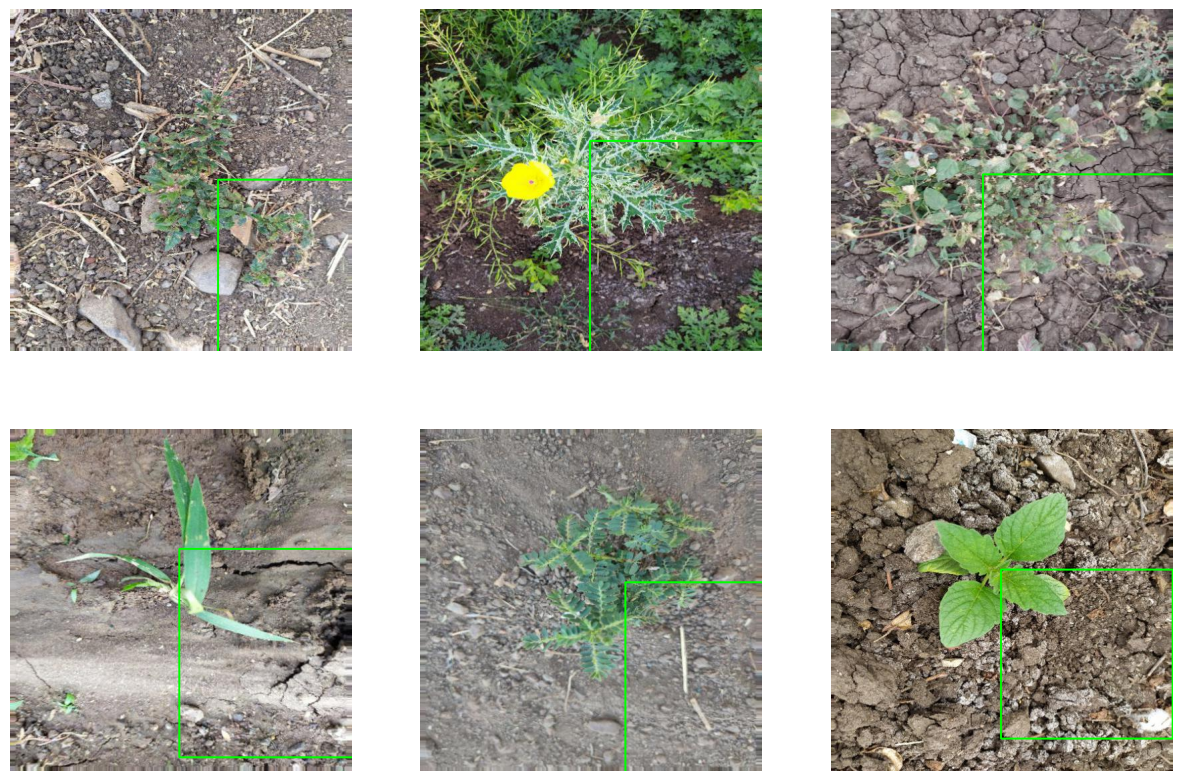

In [15]:
# Training images and labels
image_folder = 'datasets/working/train/images'
labels_folder = 'datasets/working/train/labels'

# Load list of image files
image_files = os.listdir(image_folder)
image_files = [x for x in image_files if '.jpeg' in x]
image_files.sort()
print(image_files[:6])

# Selecting random images
# random.shuffle(image_files)
random_image_files = image_files[:6]

# Display random images with tags
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(num_images):
    # Upload image
    image_file = os.path.join(image_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load labels from file
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Display image with labels
    for label in labels:
        class_id, x, y, width, height = map(float, label.strip().split())
        x = int(x * image.shape[1])
        y = int(y * image.shape[0])
        width = int(width * image.shape[1])
        height = int(height * image.shape[0])
        cv2.rectangle(image, (x, y), (x + width, y + height), (0,255,0), 2)
    
    # Display image
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout
plt.show()